In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import preprocessing
from sklearn import utils
from pandas.plotting import scatter_matrix


In [13]:
df = pd.read_csv('Admission_Predict.csv')
del df['Serial No.']
print(df.head(5))
#normalizing and standardizing data
print(df.isnull().values.any())

   GRE Score  TOEFL Score  University Rating  SOP  LOR   CGPA  Research  \
0        337          118                  4  4.5   4.5  9.65         1   
1        324          107                  4  4.0   4.5  8.87         1   
2        316          104                  3  3.0   3.5  8.00         1   
3        322          110                  3  3.5   2.5  8.67         1   
4        314          103                  2  2.0   3.0  8.21         0   

   Chance of Admit   
0              0.92  
1              0.76  
2              0.72  
3              0.80  
4              0.65  
False


    Actual  Predicted
0     0.71   0.647408
1     0.70   0.637285
2     0.79   0.819508
3     0.73   0.617037
4     0.72   0.718273
..     ...        ...
75    0.61   0.667655
76    0.69   0.617037
77    0.62   0.687902
78    0.93   0.900496
79    0.43   0.525926

[80 rows x 2 columns]


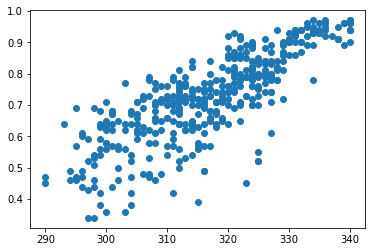

accuracy: 0.5456668070172048


In [14]:
#print frequence distribution for the categorical 
#print(df['University Rating'].value_counts(), 'describe')

#bar diagram for categorical variable
#uni= df['University Rating']
plt.scatter(df['GRE Score'], df['Chance of Admit '])

X = df['GRE Score'].values.reshape(-1, 1)
y = df['Chance of Admit '].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
pred = model.predict(X_test)
df2 = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': pred.flatten()})
print(df2)

#uni.value_counts().plot(kind='bar')
#df['Research'].hist(by=df['University Rating'])
#df.boxplot(by='Research', column='University Rating', grid=False)
plt.show()

accuracy = model.score(X_test, y_test)
print('accuracy:',accuracy)

In [11]:
#correlation coefficient
Corr_Data = df[['GRE Score', 'Chance of Admit']]
pearsoncorr = Corr_Data.corr(method='pearson')
print('corr', pearsoncorr) #0.835977 is strong positive correlation

gre_reshape= df['GRE Score'].values.reshape(-1,1)
toefl_reshape= df['TOEFL Score'].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(toefl_reshape, gre_reshape, test_size=0.2, random_state=0)

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_pred = lin_reg.predict(X_test)

#scatter diagram
plt.scatter(X_train, y_train)
plt.plot(X_train, lin_reg.predict(X_train))
plt.title("TOEFL Score - GRE Score")
plt.xlabel("TOEFL Score")
plt.ylabel("Gre Score")
plt.show()

#r squared
from sklearn import metrics
print('R square = ',metrics.r2_score(y_test, lin_pred))

df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': lin_pred.flatten()})
print(df)

KeyError: "['Chance of Admit'] not in index"

In [ ]:
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
from scipy.special import stdtr
from scipy import stats
res0 = df[df['Research']==0]
res1 = df[df['Research']==1]
#print(res0.head(5))
first_review = res0['GRE Score'].values
second_review = res1['GRE Score'].values
#print((res0['GRE Score'].describe(),res1['GRE Score'].describe()))

t, p = ttest_rel(first_review[:10], second_review[:10])
print('paired ttest:            t = %g  p = %g' % (t, p))

#independent t test.
#gre score and toefl score of students that applied to universities that does not require research

second_review_toefl = res0['TOEFL Score'].values
print(res0['GRE Score'].describe(),res0['TOEFL Score'].describe())

t, p = ttest_ind(first_review, second_review_toefl)
print("ttest_ind:t = %g  p = %g" % (t, p))

In [ ]:
X = df[['University Rating', 'GRE Score', 'TOEFL Score']]
y = df[['Research']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Data normalization  
#print(y_train)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=20000)
mlp.fit(X_train, y_train.values.ravel())
y_pred = mlp.predict(X_test)
print(y_pred)

#performance
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
accuracy =  accuracy_score(y_test,y_pred)*100
print(accuracy)

In [ ]:
gre_reshape= df['GRE Score'].values.reshape(-1,1)
admit_reshape= df['Chance of Admit '].values.reshape(-1,1)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(admit_reshape, gre_reshape, test_size=0.2, random_state=0)

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10)
regressor.fit(X_train, y_train.ravel())
y_pred = regressor.predict(X_test)

from sklearn import metrics
print('R square = ',metrics.r2_score(y_test, y_pred))
print('Mean squared Error = ',metrics.mean_squared_error(y_test, y_pred))

plt.scatter(X_train, y_train)
plt.plot(X_train, regressor.predict(X_train))
plt.title("Chance of Admit - GRE Score")
plt.xlabel("Chance of Admit")
plt.ylabel("Gre Score")
plt.show()

In [ ]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

#feature scaling
from sklearn.preprocessing import StandardScaler
ss_X = StandardScaler()
X_train = ss_X.fit_transform(X_train)
X_test = ss_X.transform(X_test)

In [ ]:
#logistic regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0, solver="liblinear")
classifier.fit(X_train, y_train.values.ravel())
# Step 6 - Predict
y_pred = classifier.predict(X_test)

# Step 7 - Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
#accuracy of 76%

In [ ]:
# Step 5 - Fit SVC Classifier
from sklearn.svm import SVC
classifier = SVC(kernel = "linear", random_state=0)
classifier.fit(X_train, y_train.values.ravel())

y_pred = classifier.predict(X_test)

# Step 7 - Confusion Matrix
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred) 
print(cm)
accuracy = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",accuracy)
#accuray of 80% and svm has made 11+9= 20 incorrect predictions